In [16]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import keras

In [2]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

X_train.shape: (60000, 28, 28), y_train.shape: (60000,), X_test.shape: (10000, 28, 28), y_test.shape: (10000,))
X_train.dtype: uint8, y_train.dtype: uint8, X_test.dtype: uint8, y_test.dtype: uint8
X_train.Range: 255 - 0, X_test.Range: 255 - 0


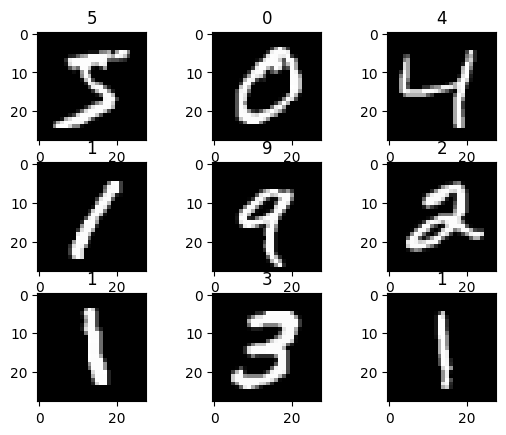

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = load_data()

# Investigate loaded data
print('X_train.shape: {}, y_train.shape: {}, X_test.shape: {}, y_test.shape: {})'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
print('X_train.dtype: {}, y_train.dtype: {}, X_test.dtype: {}, y_test.dtype: {}'.format(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype))
print('X_train.Range: {} - {}, X_test.Range: {} - {}'.format(X_train.max(), X_train.min(), X_test.max(), X_test.min()))

# Dispaly some loaded image data
display_img(X_train[:9], y_train[:9])

In [4]:
# Turn 2D images into 3D so that X_train and TrainY will be 4D since Convolutional layer takes 4D data as input.
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

# Investigate updated x
print('X_train.shape: {}, X_test.shape: {})'.format(X_train.shape, X_test.shape))
print('X_train.dtype: {}, X_test.dtype: {}'.format(X_train.dtype, X_test.dtype))
print('X_train.Range: {} - {}, X_test.Range: {} - {}'.format(X_train.max(), X_train.min(), X_test.max(), X_test.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# Investigate updated y
print('y_train.shape: {}, y_test.shape: {})'.format(y_train.shape, y_test.shape))
print('y_train.dtype: {}, X_test.dtype: {}'.format(y_train.dtype, y_test.dtype))
print(y_train[:5])

X_train.shape: (60000, 28, 28, 1), X_test.shape: (10000, 28, 28, 1))
X_train.dtype: uint8, X_test.dtype: uint8
X_train.Range: 255 - 0, X_test.Range: 255 - 0
y_train.shape: (60000, 10), y_test.shape: (10000, 10))
y_train.dtype: float64, X_test.dtype: float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
# Normalize dataset
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [6]:
# Build a FCNN
inputs = Input((28, 28, 1), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(512, activation = 'relu')(x)
x = Dense(4, activation = 'relu')(x)
x = Dense(8, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
x = Dense(8, activation = 'relu')(x)
x = Dense(4, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,378 (1.54 MB)

 Trainable params: 404,378 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9865 - loss: 0.0477 - val_accuracy: 0.9752 - val_loss: 0.1319
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9869 - loss: 0.0431 - val_accuracy: 0.9730 - val_loss: 0.1308
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0348 - val_accuracy: 0.9737 - val_loss: 0.1322
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0282 - val_accuracy: 0.9708 - val_loss: 0.1528
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0277 - val_accuracy: 0.9745 - val_loss: 0.1419
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0238 - val_accuracy: 0.9733 - val_loss: 0.1575
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9713 - val_loss: 0.1870
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.

In [15]:
# Evaluate model performance
model.evaluate(X_test, y_test)

# Predict Y values
y_predict = model.predict(X_test)

print('    y       y_predict')
print('=========   ==========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9655 - loss: 0.1904
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
    y       y_predict
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 6
9 		 9


# Fashion Dataset

In [18]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [24]:
(X_train, y_train), (X_test, y_test) = load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

In [25]:
# Investigate loaded data
print('X_train.shape: {}, y_train.shape: {}, X_test.shape: {}, y_test.shape: {})'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
print('X_train.dtype: {}, y_train.dtype: {}, X_test.dtype: {}, y_test.dtype: {}'.format(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype))
print('X_train.Range: {} - {}, X_test.Range: {} - {}'.format(X_train.max(), X_train.min(), X_test.max(), X_test.min()))

X_train.shape: (60000, 28, 28), y_train.shape: (60000,), X_test.shape: (10000, 28, 28), y_test.shape: (10000,))
X_train.dtype: uint8, y_train.dtype: uint8, X_test.dtype: uint8, y_test.dtype: uint8
X_train.Range: 255 - 0, X_test.Range: 255 - 0


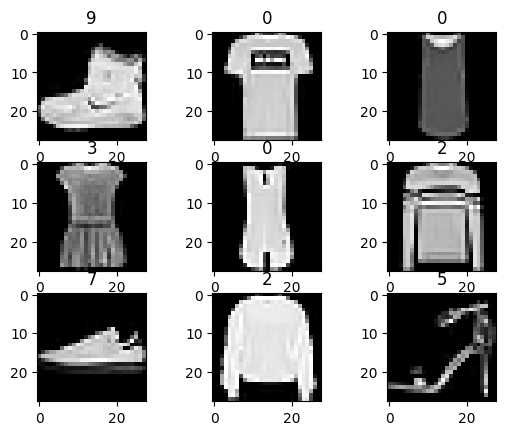

In [26]:
display_img(X_train[:9], y_train[:9])

In [27]:
# Turn 2D images into 3D so that X_train and TrainY will be 4D since Convolutional layer takes 4D data as input.
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

# Investigate updated x
print('X_train.shape: {}, X_test.shape: {})'.format(X_train.shape, X_test.shape))
print('X_train.dtype: {}, X_test.dtype: {}'.format(X_train.dtype, X_test.dtype))
print('X_train.Range: {} - {}, X_test.Range: {} - {}'.format(X_train.max(), X_train.min(), X_test.max(), X_test.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# Investigate updated y
print('y_train.shape: {}, y_test.shape: {})'.format(y_train.shape, y_test.shape))
print('y_train.dtype: {}, X_test.dtype: {}'.format(y_train.dtype, y_test.dtype))
print(y_train[:5])

X_train.shape: (60000, 28, 28, 1), X_test.shape: (10000, 28, 28, 1))
X_train.dtype: uint8, X_test.dtype: uint8
X_train.Range: 255 - 0, X_test.Range: 255 - 0
y_train.shape: (60000, 10), y_test.shape: (10000, 10))
y_train.dtype: float64, X_test.dtype: float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
# Normalize dataset
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [45]:
model.compile(optimizer="rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 100)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9646 - loss: 0.1057 - val_accuracy: 0.8842 - val_loss: 0.6103
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9678 - loss: 0.0982 - val_accuracy: 0.8857 - val_loss: 0.5900
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9682 - loss: 0.0972 - val_accuracy: 0.8870 - val_loss: 0.6046
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9698 - loss: 0.0966 - val_accuracy: 0.8785 - val_loss: 0.6080
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9691 - loss: 0.0987 - val_accuracy: 0.8773 - val_loss: 0.6231
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9704 - loss: 0.0909 - val_accuracy: 0.8728 - val_loss: 0.6684
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9703 - loss: 0.0911 - val_accuracy: 0.8867 - val_loss: 0.6065
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9704 - loss: 0.0929 - val_acc

In [49]:
# Evaluate model performance
model.evaluate(X_test, y_test)

# Predict Y values
y_predict = model.predict(X_test)

print('    y       y_predict')
print('=========   ==========')
for i in range(10):
  print('   ', np.argmax(y_test[i]), '\t       ', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 1.1186
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
    y       y_predict
=========   ==========
    9 	        9
    2 	        2
    1 	        1
    1 	        1
    6 	        6
    1 	        1
    4 	        4
    6 	        6
    5 	        5
    7 	        7


In [50]:
model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, validation_split = 0.1, epochs = 10)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9816 - loss: 0.0648 - val_accuracy: 0.8778 - val_loss: 0.7830
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0782 - val_accuracy: 0.8807 - val_loss: 0.7213
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9850 - loss: 0.0545 - val_accuracy: 0.8813 - val_loss: 0.7295
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9837 - loss: 0.0514 - val_accuracy: 0.8768 - val_loss: 0.7653
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9806 - loss: 0.0659 - val_accuracy: 0.8817 - val_loss: 0.7228
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.8712 - val_loss: 0.7361
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.0923 - val_accuracy: 0.8803 - val_loss: 0.7191
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.

In [51]:
# Evaluate model performance
model.evaluate(X_test, y_test)

# Predict Y values
y_predict = model.predict(X_test)

print('    y       y_predict')
print('=========   ==========')
for i in range(10):
  print('   ', np.argmax(y_test[i]), '\t       ', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.7664
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
    y       y_predict
=========   ==========
    9 	        9
    2 	        2
    1 	        1
    1 	        1
    6 	        6
    1 	        1
    4 	        4
    6 	        6
    5 	        5
    7 	        7
